# Machine Learning: Assignment 4
## Regression methods (max. 10p)

In [1]:
# Write Your information in here
student_name = 'Janne Arkko'
student_id = "AB3817"

## Assignment 4.1: Preprocess the data (2 p)
### Topic: Productivity of textile workers

1. Explore and download the data from [https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#). Load the data into the DataFrame.

2. Remove background variables from the analyzed data.

3. Decide what to do with the missing values.

4. Normalize the data.

5. Additionally, create a new class variable with a value of 0 if the productivity is less than 0.5 and with a value of 1 if the productivity is above 0.5. Store this in the df variable as column `class`. That will be used in classification assignment (4.3).

In [2]:
# TODO: Write your code in this cell.

# TODO: Data Preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def class_filler(productivity): # fill 'class' column
    if productivity < 0.5:
        return 0
    else:
        return 1

df = pd.read_csv('garments_worker_productivity.csv')

secondary_columns = ['idle_time', 'idle_men', 'no_of_style_change', 'date'] # remove secondary columns
df.drop(columns=secondary_columns, inplace=True)

df.fillna(df.mean(), inplace=True) # fill NaN values with the mean of the column

df.replace({'Quarter1': 1,'Quarter2': 2,'Quarter3': 3, 'Quarter4': 4, 'Quarter5': 5}, inplace=True)
df.replace({'sweing': 1, 'finishing': 2, 'finishing ': 2}, inplace=True) # duplicate 'finishing' values with a space after the string
df.replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Saturday': 6, 'Sunday': 7}, inplace=True) # friday missing from data

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) # normalize
df_normalized['class'] = np.where(df_normalized['actual_productivity'] < 0.5, 0, 1) # add 'class' column 

df_normalized



C:\Users\janne\AppData\Local\Temp\ipykernel_20352\3163795253.py:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True) # fill NaN values with the mean of the column


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity,class
0,0.00,0.0,0.500000,0.636364,1.000000,0.450252,0.047631,0.273148,0.027222,0.655172,0.797332,1
1,0.00,1.0,0.500000,0.000000,0.931507,0.020132,0.051199,0.037037,0.000000,0.068966,0.736180,1
2,0.00,0.0,0.500000,0.909091,1.000000,0.164731,0.041575,0.141204,0.013889,0.327586,0.639274,1
3,0.00,0.0,0.500000,1.000000,1.000000,0.164731,0.041575,0.141204,0.013889,0.327586,0.639274,1
4,0.00,0.0,0.500000,0.454545,1.000000,0.445219,0.050314,0.074074,0.013889,0.620690,0.639062,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.25,1.0,0.333333,0.818182,0.931507,0.000000,0.051199,0.037037,0.000000,0.068966,0.445036,0
1193,0.25,1.0,0.333333,0.636364,0.863014,0.019357,0.051199,0.037037,0.000000,0.068966,0.441982,0
1194,0.25,1.0,0.333333,0.545455,0.794521,0.019357,0.051199,0.037037,0.000000,0.068966,0.441982,0
1195,0.25,1.0,0.333333,0.727273,0.931507,0.000000,0.051199,0.069444,0.000000,0.149425,0.306951,0


In [3]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df_normalized.columns}')
print(f'First row by position: {df_normalized.iloc[0]}')

Columns: Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'class'],
      dtype='object')
First row by position: quarter                  0.000000
department               0.000000
day                      0.500000
team                     0.636364
targeted_productivity    1.000000
smv                      0.450252
wip                      0.047631
over_time                0.273148
incentive                0.027222
no_of_workers            0.655172
actual_productivity      0.797332
class                    1.000000
Name: 0, dtype: float64


## Assignment 4.2: Regression using a Linear Regression model (2 p)

1. Split the data into training (67%) and testing data (33%), also saving the class variables as their own vectors (`X_train`, `y_train`, `X_test`, `y_test`). Use random seed `2150`.

Tip: don't put the columns `actual_productivity` or `class` in the input variables (features).

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a regression model using a linear regressor. So you try to predict the `actual_productivity` variable.

Use random seed `2100`.

3. Predict the `actual_productivity` of the test dataset. Record the explained variance `exp_var` and
the maximum error `max_err` using the tools in the `metrics` module of the library.

In [7]:
# TODO: Write your code in this cell
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, max_error

X_test = X_train = exp_var = max_err = None

columns_to_drop = ['actual_productivity', 'class']
y = df_normalized['actual_productivity']
X = df_normalized.drop(columns=columns_to_drop)

# TODO: Split the data into training (67%) and testing data (33%)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=2150)

In [10]:
# TODO: Create and test Linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

# explained weighted variance calculations below using error-based weights:
residuals = y_test - y_pred
weights = 1 / np.abs(residuals)
weights /= np.sum(weights)

WSSR = np.sum(weights * (y_test - y_pred) ** 2)
WTSS = np.sum(weights * (y_test - np.mean(y_test)) ** 2)

exp_var_2 = 1 - (WSSR / WTSS)

In [11]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err variables.
# print(f'Test length: {len(X_test)}')
# print(f'Train length: {len(X_train)}')
# print(f'Train columns: {X_train.columns}')
# print(f'Train columns length: {len(X_train.columns)}')
# print(f'Predict 5 items: {y_pred[:5]} ... {y_pred[-5:]}')

#exp_var = max_err = exp_var_2 = None

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')
print(f'Explained variance (Weighted): {exp_var_2}')

Explained variance: 0.21467257994391398
Maximum error: 0.5993821836535267
Explained variance (Weighted): 0.7981509731906606


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [12]:
# TODO: Explained variance
exp_var_weighted = None
print(f'Explained variance (Weighted): {exp_var_2}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance (Weighted): 0.7981509731906606
Explained variance (Weighted): None


## Assignment 4.3: Classification using Random Forest (2 p)

1. Create training and testing data. Use random seed `2150`. Note that the `class` variable is now predicted.

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a classification model using a random forest. Use random seed `2100`. So let's try to predict the class variable `class`.

3. Predict `class` from the test data. Generate the accuracy report `cr` and the confusion matrix `cm` using the tools in the `metrics` module of the library.

In [13]:
# TODO: Write your code in this cell
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_test = X_train = cr = cm = None

columns_to_drop = ['actual_productivity', 'class']
y = df_normalized['class']
X = df_normalized.drop(columns=columns_to_drop)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=2150)

rf_classifier = RandomForestClassifier(random_state=2100)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [14]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
# The results are in cm and cr variables.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(cr)
print(cm)

Test length: 396
Train length: 801
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       127
           1       0.84      0.93      0.88       269

    accuracy                           0.83       396
   macro avg       0.82      0.77      0.79       396
weighted avg       0.82      0.83      0.82       396

[[ 78  49]
 [ 20 249]]


Show the importance of the features when using the **Random Forest Classifier** method.

In [15]:
# TODO: the importance of features
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_

features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features = features.sort_values(by='Importance', ascending=False)

print(features)

                 Feature  Importance
4  targeted_productivity    0.191020
8              incentive    0.134593
5                    smv    0.121997
9          no_of_workers    0.117700
7              over_time    0.103634
3                   team    0.095583
2                    day    0.089464
0                quarter    0.072155
6                    wip    0.044437
1             department    0.029416


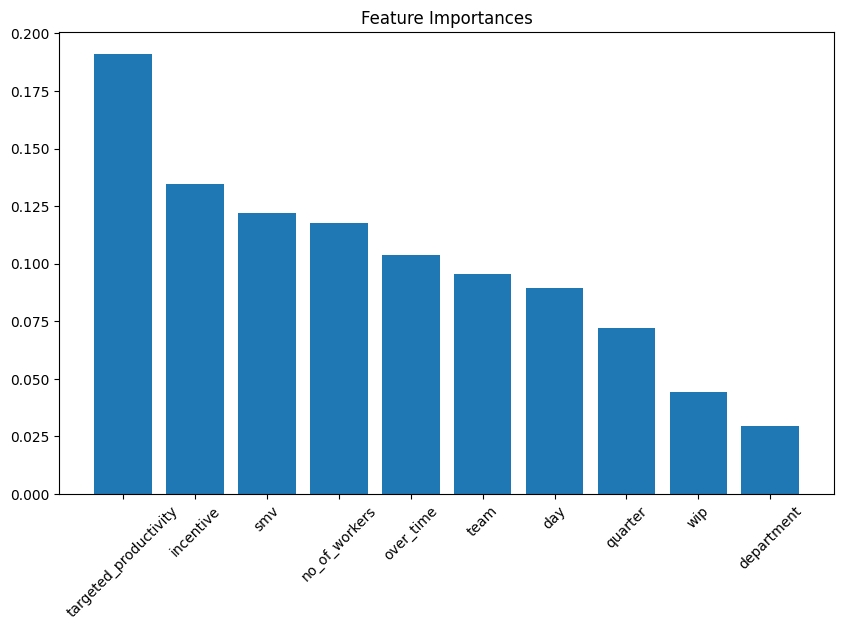

In [16]:
# TODO: Visualize the importance of features

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(features['Feature'], features['Importance'])
plt.xticks(rotation=45)
plt.show()

## Assignment 4.4: Regression using Random Forest Regressor (2 p)

Repeat same than **assignment 4.2** but now using a **Random Forest Regression** method.

Also calculate the *explained variance* and *maximum error*.

In [19]:
# TODO: Write your code in this cell
# TODO: use Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

X_test = X_train = exp_var = max_err = None

columns_to_drop = ['actual_productivity', 'class']
y = df_normalized['actual_productivity']
X = df_normalized.drop(columns=columns_to_drop)

# TODO: Split the data into training (67%) and testing data (33%)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=2150)

rf_regressor = RandomForestRegressor(random_state=2150)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

# explained weighted variance calculations below using error-based weights:
residuals = y_test - y_pred
weights = 1 / np.abs(residuals)
weights /= np.sum(weights)

WSSR = np.sum(weights * (y_test - y_pred) ** 2)
WTSS = np.sum(weights * (y_test - np.mean(y_test)) ** 2)

exp_var_2 = 1 - (WSSR / WTSS)

In [20]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err and exp_var_2 variables.

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')

Explained variance: 0.45442006761454745
Maximum error: 0.6951199336407414


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [21]:
# TODO: Explained variance

print(f'Explained variance (Weighted): {exp_var_2}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

# exp_var_2 holds the weighted explained variance already so don't know why we should print it twice here.

Explained variance (Weighted): 0.9741721804311205
Explained variance (Weighted): None


Show the **importance of the features** when using **Random Forest Regressor** method.

In [25]:
# TODO: the importance of features with Random Forest Regressor
feature_importances_2 = rf_regressor.feature_importances_

features_2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_2 = features_2.sort_values(by='Importance', ascending=False)

print(features_2)

                 Feature  Importance
4  targeted_productivity    0.191020
8              incentive    0.134593
5                    smv    0.121997
9          no_of_workers    0.117700
7              over_time    0.103634
3                   team    0.095583
2                    day    0.089464
0                quarter    0.072155
6                    wip    0.044437
1             department    0.029416


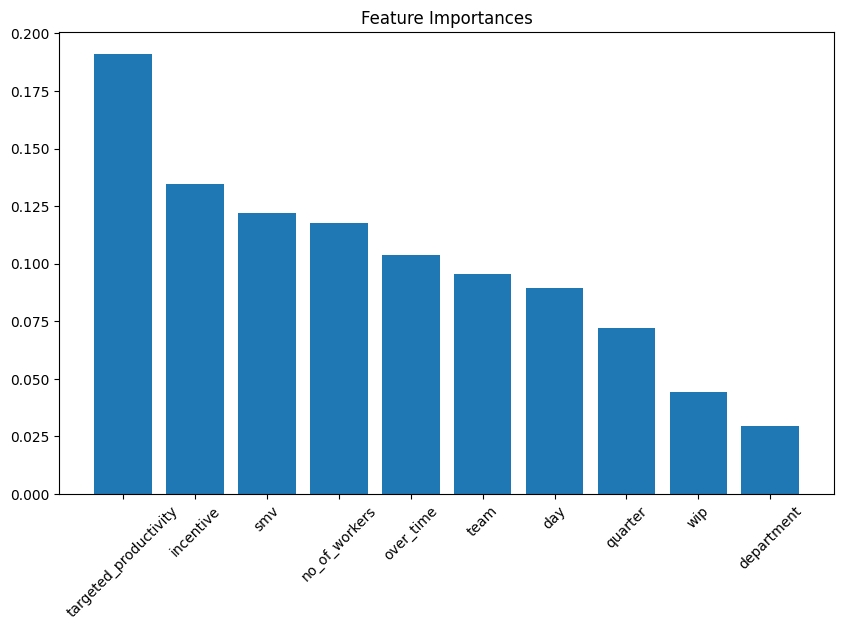

In [26]:
# TODO: Visualize the importance of features

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(features_2['Feature'], features_2['Importance'])
plt.xticks(rotation=45)
plt.show()

## Assignment 4.5: Analysis of results (2 p)

Let's do a result analysis where you verbally compare the regression results obtained in the assignments 4.2 and 4.4.
* **4.2** (Linear regression) and
* **4.4** (Random Forest regression).

You can use **tables** or **figures** to present results in addition to verbal explanation and analysis.

* TODO: Analysis of regression results.
### Comparison of Different Regression Models
* Compare the regression results of Random Forest and Linear Regression models.
* Is there others good regression methods to apply with this dataset?

## 4.5 answers

To analyse the difference in the models, we need to look at the metrics they provided.

Explained variance:
Linear Regression model had explained variance of 0.2147 and RandomForestRegressor model had explained variance of 0.4544.
A higher value here is better so RFR was alot better in predicting the variance in the target variable which was 'actual-productivity' in these sets.

Maximum error:
LR model had max error of 0.5994 and RFR max error was 0.6951.
Here, a smaller value is better, therefore LR performed the best here, even tho both models had quite high max error nonetheless.
So even LR's overall predictability is weaker than RFR's, it does not make as extreme errors in any single prediction than the RFR does.

Weighted Explained variance:
This was quite a challenge as skicit.learn -library does not have a straightforward method for this so I had to manually calculate the weighted exp var.
LR's weighter exp var was 0.7982 and RFR's was 0.9742!
I used an error-based weights in my calculations where I used the residuals of the actual y-values and the predicted y-values to calculate the weight. 
This means that the further away from the actual y-value the predicted y-value was, the smaller the weight was in the calculations.
RFR scored a staggering 0.9742, which, when normalized to 1, is almost the best there can be so definitely RFR was way better. LR's weighted exp var was not bad either.

Overall RFR was better model for this dataset, especially when weights were introduced.

### Other methods for this dataset

- Lasso Regression
- Elastic Net Regression (this dataset might have quite high correlation in features so Elastic Net could work here)
- Decision Tree Regressor

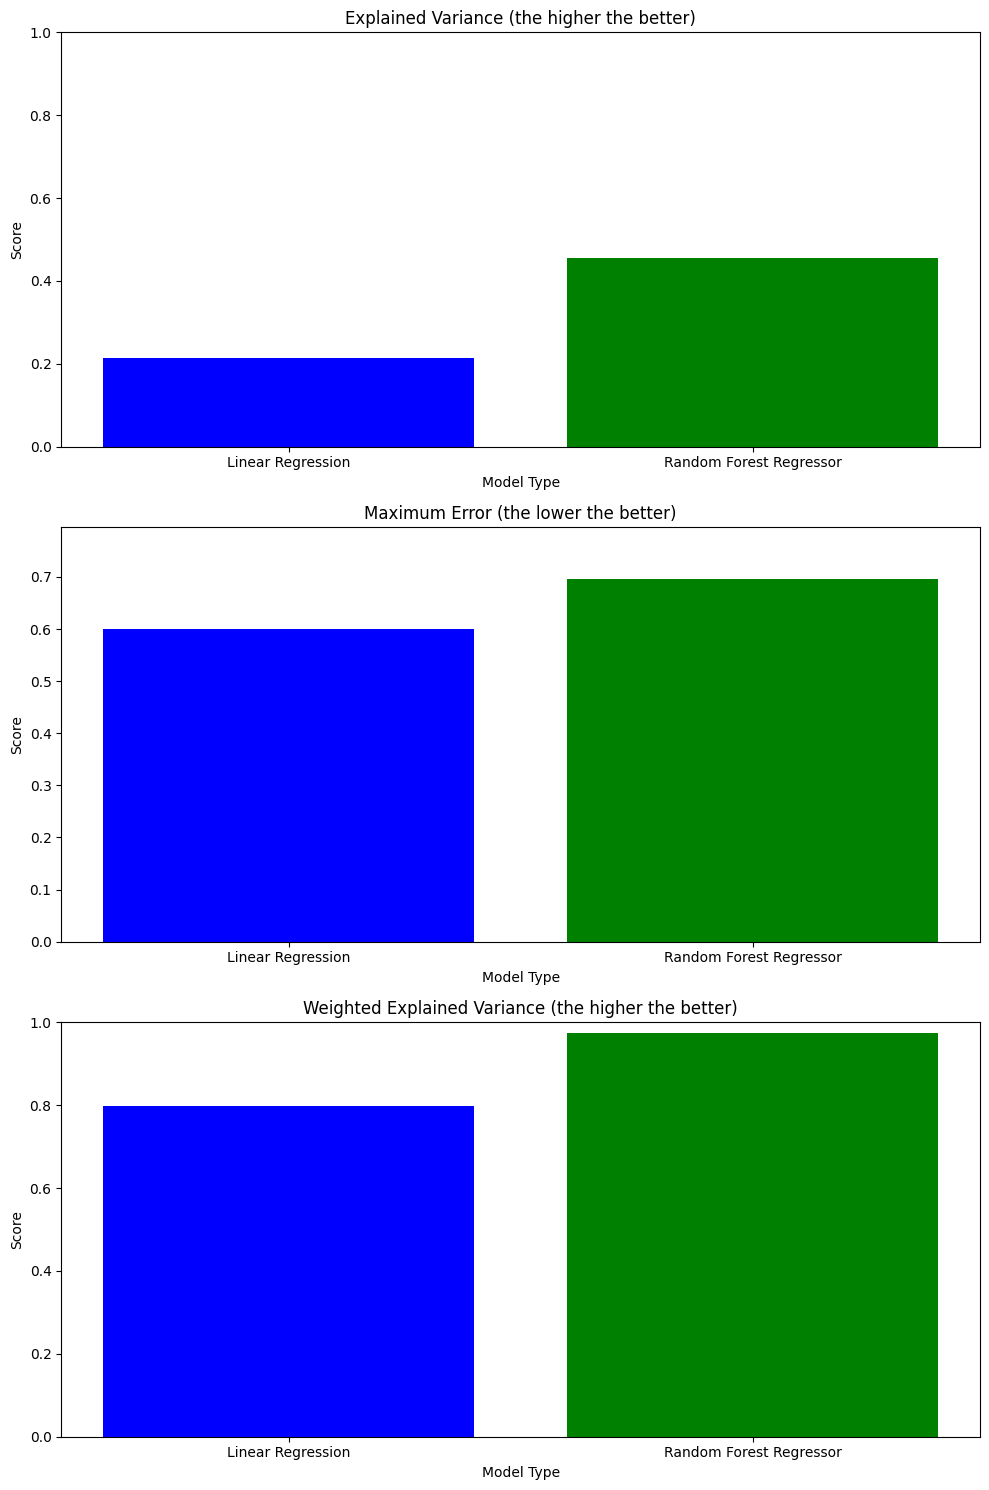

In [28]:
# figures

# Metrics for Linear Regression and Random Forest Regressor
metrics = {
    'Explained Variance': [0.2147, 0.4544],
    'Maximum Error': [0.5994, 0.6951],
    'Weighted Explained Variance': [0.7982, 0.9742]
}

models = ['Linear Regression', 'Random Forest Regressor']

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Explained Variance
ax[0].bar(models, [metrics['Explained Variance'][0], metrics['Explained Variance'][1]], color=['blue', 'green'])
ax[0].set_title('Explained Variance (the higher the better)')
ax[0].set_ylim(0, 1)

# Maximum Error
ax[1].bar(models, [metrics['Maximum Error'][0], metrics['Maximum Error'][1]], color=['blue', 'green'])
ax[1].set_title('Maximum Error (the lower the better)')
ax[1].set_ylim(0, max(metrics['Maximum Error']) + 0.1)

# Weighted Explained Variance
ax[2].bar(models, [metrics['Weighted Explained Variance'][0], metrics['Weighted Explained Variance'][1]], color=['blue', 'green'])
ax[2].set_title('Weighted Explained Variance (the higher the better)')
ax[2].set_ylim(0, 1)

for a in ax:
    a.set_ylabel('Score')
    a.set_xlabel('Model Type')

plt.tight_layout()
plt.show()
